In [1]:
paciente='paciente1'

In [2]:
import codigo
from codigo import utils
from codigo import model_utils
import time

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

In [5]:
with open('dataset/generado/'+paciente+'/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [6]:
len(array_Xtrain)

1523

In [7]:
array_Xtrain.shape

(1523, 30, 5)

In [8]:
with open('dataset/generado/'+paciente+'/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [9]:
len(array_Ytrain)

1523

In [10]:
array_Ytrain.shape

(1523, 1)

In [11]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

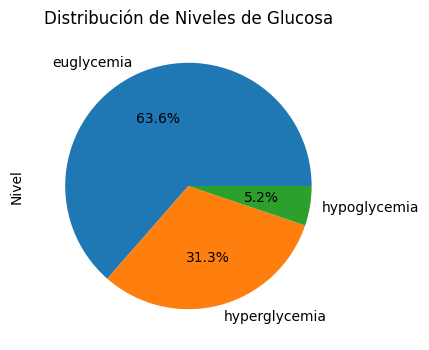

In [12]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [13]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       968
hyperglycemia    476
hypoglycemia      79
Name: Nivel, dtype: int64

In [14]:
df_Y_scaled

,Glucose level,Nivel
0,73.0,euglycemia
1,73.0,euglycemia
2,69.0,hypoglycemia
3,73.0,euglycemia
4,81.0,euglycemia
...,...,...
1518,135.0,euglycemia
1519,147.0,euglycemia
1520,123.0,euglycemia
1521,92.0,euglycemia


## Paso 1

In [15]:
N=5
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

In [16]:
print(len(XP[2]))

305


In [17]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

In [18]:
from multiprocessing.pool import ThreadPool as Pool
import time

In [19]:

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 227
Program finished in 0.030028399982256815 seconds - using multiprocessing
1 466
Program finished in 0.025068399991141632 seconds - using multiprocessing
2 680
Program finished in 0.03051359998062253 seconds - using multiprocessing
3 904
Program finished in 0.027826700010336936 seconds - using multiprocessing
4 1122
Program finished in 0.031032600003527477 seconds - using multiprocessing


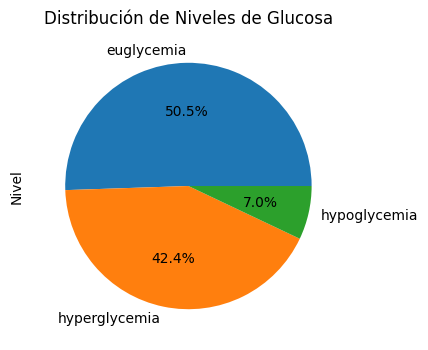

In [20]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [21]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       567
hyperglycemia    476
hypoglycemia      79
Name: Nivel, dtype: int64

<AxesSubplot: >

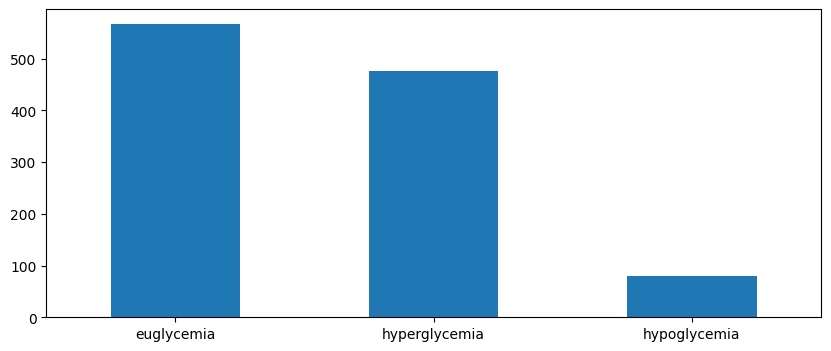

In [22]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [23]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down.npy', 'wb') as f:
    np.save(f, XNew)

In [24]:
len(XNew)

1122

In [25]:
XNew.shape

(1122, 30, 5)

In [26]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down.npy', 'wb') as f:
    np.save(f, YNew)

In [27]:
len(YNew)

1122

## Paso 2

In [28]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

224


In [29]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 177
Program finished in 0.02061490001506172 seconds - using multiprocessing
1 362
Program finished in 0.020885100006125867 seconds - using multiprocessing
2 530
Program finished in 0.01941480001551099 seconds - using multiprocessing
3 712
Program finished in 0.017765600001439452 seconds - using multiprocessing
4 892
Program finished in 0.02077969998936169 seconds - using multiprocessing


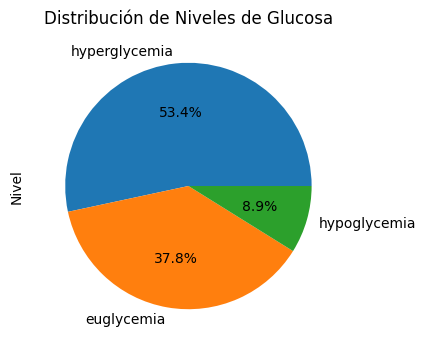

In [30]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [31]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    476
euglycemia       337
hypoglycemia      79
Name: Nivel, dtype: int64

In [32]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

178


In [33]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 139
Program finished in 0.020116100000450388 seconds - using multiprocessing
1 275
Program finished in 0.016535900009330362 seconds - using multiprocessing
2 426
Program finished in 0.014772800001082942 seconds - using multiprocessing
3 571
Program finished in 0.01897180001833476 seconds - using multiprocessing
4 707
Program finished in 0.02250849999836646 seconds - using multiprocessing


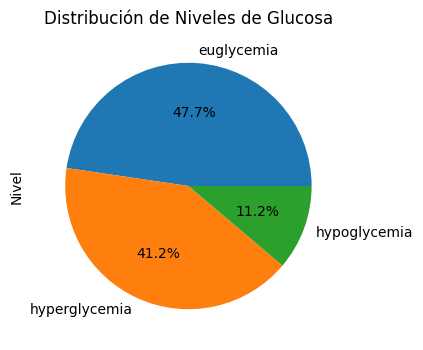

In [34]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [35]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       337
hyperglycemia    291
hypoglycemia      79
Name: Nivel, dtype: int64

In [36]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [37]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down2.npy', 'wb') as f:
    np.save(f, YNew)

## Paso 3

In [38]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

141
0 114
Program finished in 0.03883149998728186 seconds - using multiprocessing
1 238
Program finished in 0.027069599978858605 seconds - using multiprocessing
2 343
Program finished in 0.031040300003951415 seconds - using multiprocessing
3 461
Program finished in 0.042041300010168925 seconds - using multiprocessing
4 575
Program finished in 0.049369100015610456 seconds - using multiprocessing


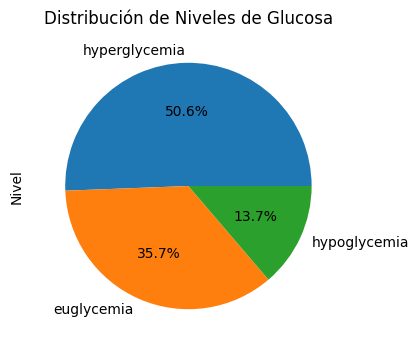

In [39]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [40]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    291
euglycemia       205
hypoglycemia      79
Name: Nivel, dtype: int64

In [41]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

115
0 92
Program finished in 0.03289279999444261 seconds - using multiprocessing
1 185
Program finished in 0.020218499994371086 seconds - using multiprocessing
2 282
Program finished in 0.023041500011458993 seconds - using multiprocessing
3 373
Program finished in 0.028112699976190925 seconds - using multiprocessing
4 460
Program finished in 0.031876000022748485 seconds - using multiprocessing


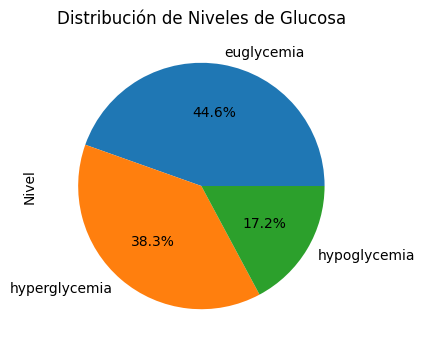

In [42]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [43]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       205
hyperglycemia    176
hypoglycemia      79
Name: Nivel, dtype: int64

In [44]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down3.npy', 'wb') as f:
    np.save(f, XNew)

In [45]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down3.npy', 'wb') as f:
    np.save(f, YNew)

## Paso 4

In [46]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

92
0 78
Program finished in 0.03154309999081306 seconds - using multiprocessing
1 157
Program finished in 0.02596800000173971 seconds - using multiprocessing
2 227
Program finished in 0.026127300021471456 seconds - using multiprocessing
3 304
Program finished in 0.024317799980053678 seconds - using multiprocessing
4 379
Program finished in 0.025912400014931336 seconds - using multiprocessing


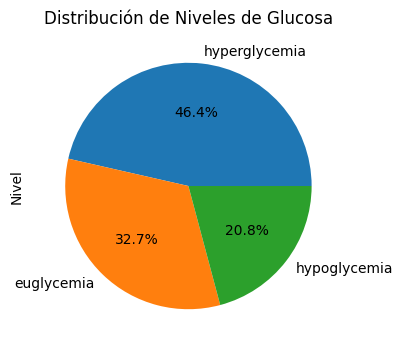

In [47]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [48]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    176
euglycemia       124
hypoglycemia      79
Name: Nivel, dtype: int64

In [49]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=5
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

76
0 62
Program finished in 0.018888499995227903 seconds - using multiprocessing
1 127
Program finished in 0.018047999998088926 seconds - using multiprocessing
2 191
Program finished in 0.01586660000612028 seconds - using multiprocessing
3 258
Program finished in 0.013611299975309521 seconds - using multiprocessing
4 320
Program finished in 0.015543899993645027 seconds - using multiprocessing


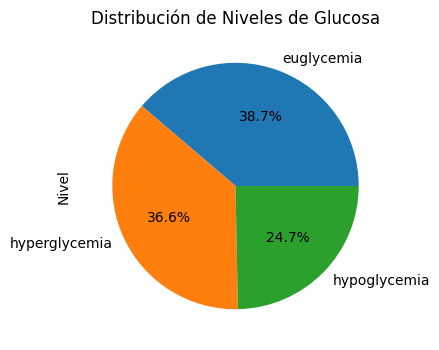

In [50]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [51]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       124
hyperglycemia    117
hypoglycemia      79
Name: Nivel, dtype: int64

In [52]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down4.npy', 'wb') as f:
    np.save(f, XNew)

In [53]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down4.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling reduciendo hasta el total de la clase minoritaria

In [54]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down4.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [55]:
array_Xtrain.shape

(320, 30, 5)

In [56]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down4.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [57]:
len(array_Ytrain)

320

In [58]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

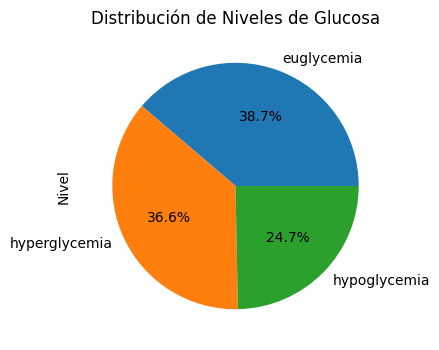

In [59]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [60]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       124
hyperglycemia    117
hypoglycemia      79
Name: Nivel, dtype: int64

In [61]:
minClass=df_Y_scaled['Nivel'].value_counts().min()

In [62]:
minClass

79

In [63]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(array_Xtrain,array_Ytrain,array_Ytrain_label,0,'hyperglycemia',False,minClass) 

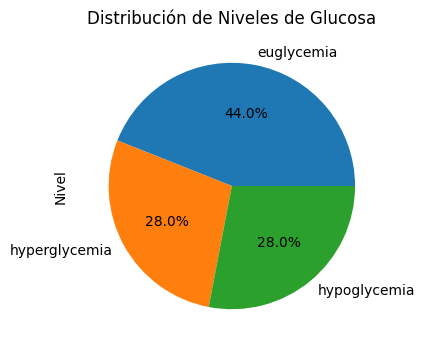

In [64]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [65]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       124
hyperglycemia     79
hypoglycemia      79
Name: Nivel, dtype: int64

In [66]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'euglycemia',False,minClass) 

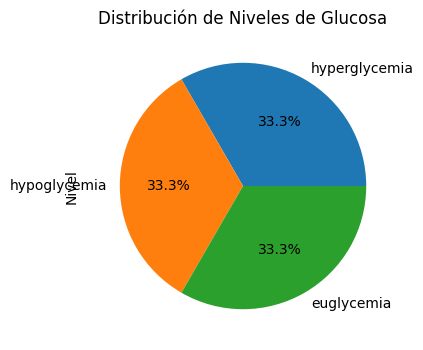

In [67]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [68]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    79
hypoglycemia     79
euglycemia       79
Name: Nivel, dtype: int64

<AxesSubplot: >

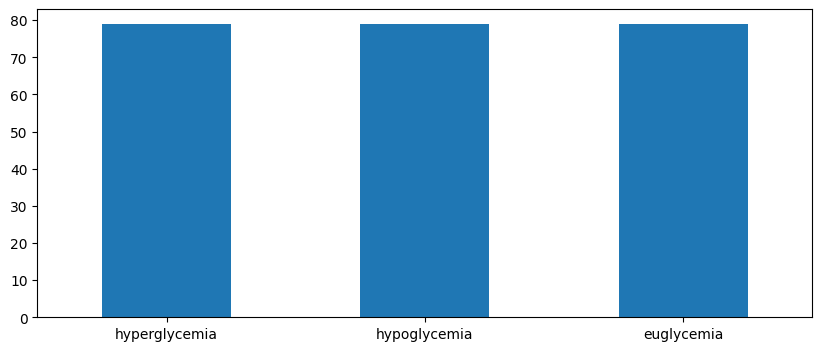

In [69]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [70]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [71]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down_equals.npy', 'wb') as f:
    np.save(f, YNew)

In [72]:
XNew.shape

(237, 30, 5)

# Downsampling on validation dataset

In [73]:
with open('dataset/generado/'+paciente+'/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [74]:
len(array_Xval)

190

In [75]:
with open('dataset/generado/'+paciente+'/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [76]:
len(array_Yval)

190

In [77]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

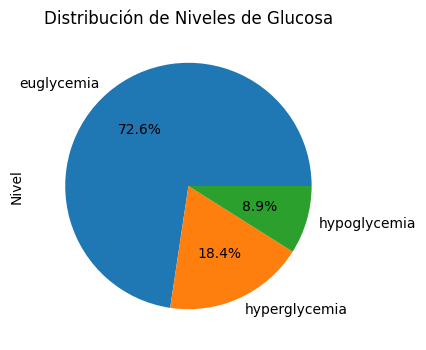

In [78]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [79]:
df_Yval_scaled['Nivel'].value_counts()

euglycemia       138
hyperglycemia     35
hypoglycemia      17
Name: Nivel, dtype: int64

<AxesSubplot: >

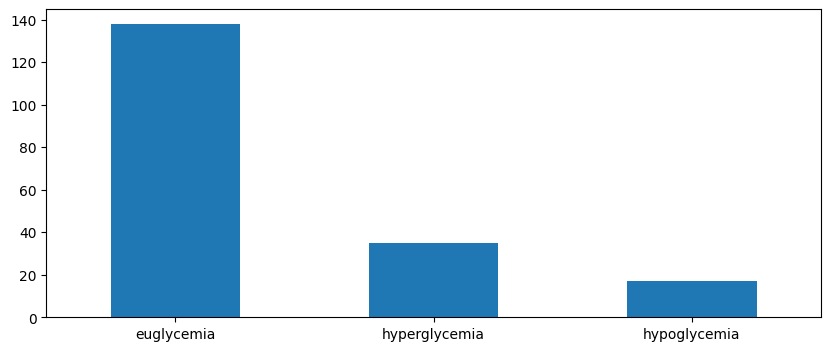

In [80]:
df_Yval_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [81]:
N=3
XP=np.array_split(array_Xval, N) 
YP=np.array_split(array_Yval, N)
Y_labelP=np.array_split( array_YVal_label, N)
print(len(XP[2]))

63


In [82]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xval.shape[1],array_Xval.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 46
Program finished in 0.02134109998587519 seconds - using multiprocessing
1 86
Program finished in 0.016932300000917166 seconds - using multiprocessing
2 130
Program finished in 0.01811529998667538 seconds - using multiprocessing


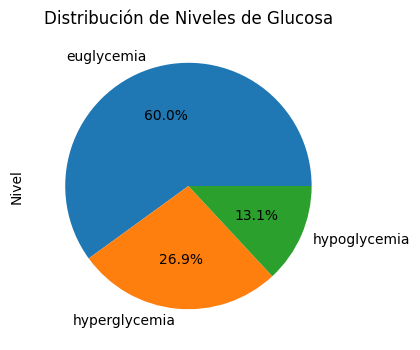

In [83]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [84]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       78
hyperglycemia    35
hypoglycemia     17
Name: Nivel, dtype: int64

In [85]:
with open('dataset/generado/'+paciente+'/array_Xval_down.npy', 'wb') as f:
    np.save(f, XNew)

In [86]:
with open('dataset/generado/'+paciente+'/array_Yval_down.npy', 'wb') as f:
    np.save(f, YNew)

In [87]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=2
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 52
Program finished in 0.012797500006854534 seconds - using multiprocessing
1 99
Program finished in 0.013158599991584197 seconds - using multiprocessing


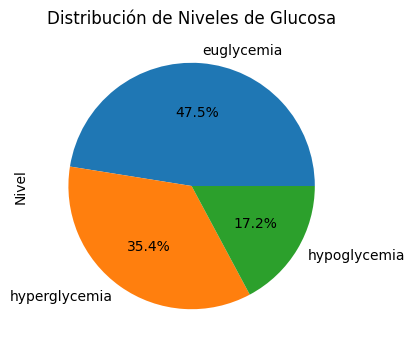

In [88]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [89]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       47
hyperglycemia    35
hypoglycemia     17
Name: Nivel, dtype: int64

In [90]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=2
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 43
Program finished in 0.013236200000392273 seconds - using multiprocessing
1 85
Program finished in 0.01333449999219738 seconds - using multiprocessing


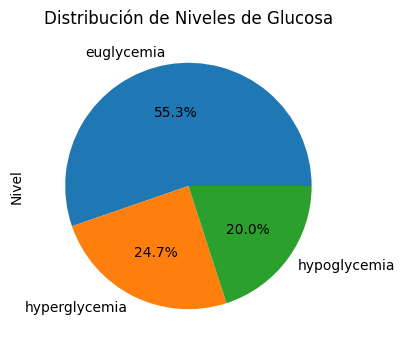

In [91]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [92]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       47
hyperglycemia    21
hypoglycemia     17
Name: Nivel, dtype: int64

In [93]:
with open('dataset/generado/'+paciente+'/array_Xval_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [94]:
with open('dataset/generado/'+paciente+'/array_Yval_down2.npy', 'wb') as f:
    np.save(f, YNew)

In [95]:
len(XNew)

85

<AxesSubplot: >

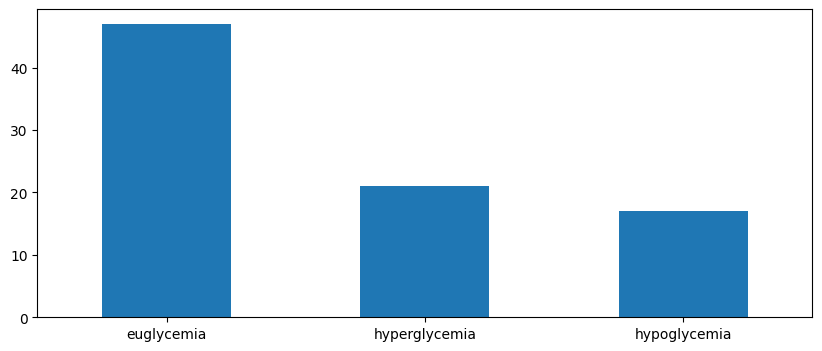

In [96]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [97]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=2
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=1
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 35
Program finished in 0.011454899999080226 seconds - using multiprocessing
1 64
Program finished in 0.011704999982612208 seconds - using multiprocessing


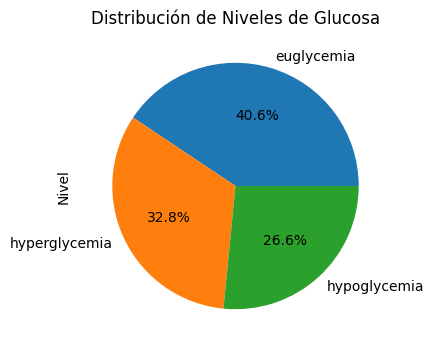

In [98]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [99]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       26
hyperglycemia    21
hypoglycemia     17
Name: Nivel, dtype: int64

In [100]:
with open('dataset/generado/'+paciente+'/array_Xval_down3.npy', 'wb') as f:
    np.save(f, XNew)

In [101]:
with open('dataset/generado/'+paciente+'/array_Yval_down3.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling reduciendo hasta el total de la clase minoritaria

In [102]:
with open('dataset/generado/'+paciente+'/array_Xval_down3.npy', 'rb') as f:
    array_Xval = np.load(f)

In [103]:
len(array_Xval)

64

In [104]:
with open('dataset/generado/'+paciente+'/array_Yval_down3.npy', 'rb') as f:
    array_Yval = np.load(f)

In [105]:
len(array_Yval)

64

In [106]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

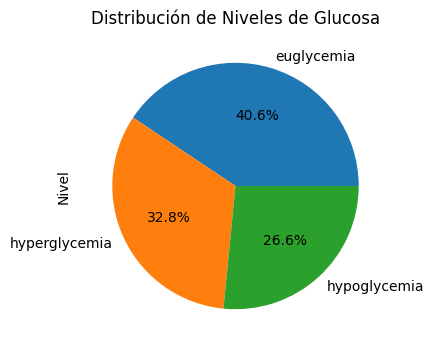

In [107]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [108]:
df_Yval_scaled['Nivel'].value_counts()

euglycemia       26
hyperglycemia    21
hypoglycemia     17
Name: Nivel, dtype: int64

In [109]:
minClass=df_Y_scaled['Nivel'].value_counts().min()
minClass

17

In [110]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(array_Xval,array_Yval,array_YVal_label,0,'hyperglycemia',False,minClass) 

In [111]:
len(YnewLabel)

60

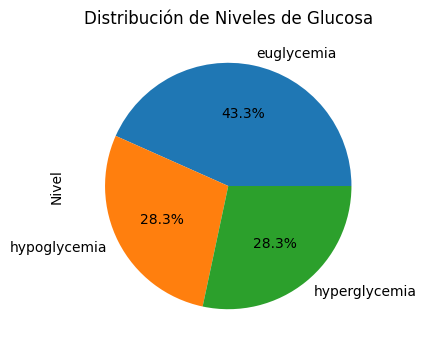

In [112]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [113]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       26
hypoglycemia     17
hyperglycemia    17
Name: Nivel, dtype: int64

In [114]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'euglycemia',False,minClass) 

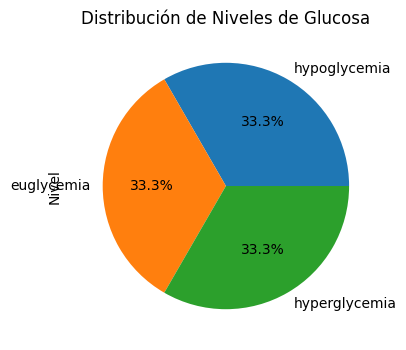

In [115]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [116]:
df_Y_scaled['Nivel'].value_counts()

hypoglycemia     17
euglycemia       17
hyperglycemia    17
Name: Nivel, dtype: int64

<AxesSubplot: >

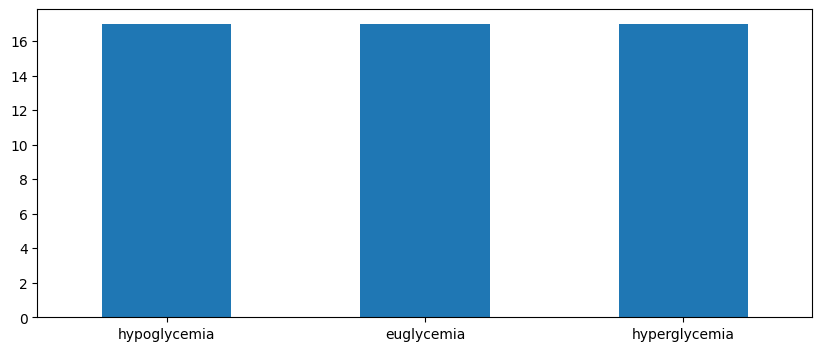

In [117]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [118]:
with open('dataset/generado/'+paciente+'/array_Xval_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [119]:
with open('dataset/generado/'+paciente+'/array_Yval_down_equals.npy', 'wb') as f:
    np.save(f, YNew)

In [120]:
XNew.shape

(51, 30, 5)